In [1]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import load_img

import numpy as np
import os

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

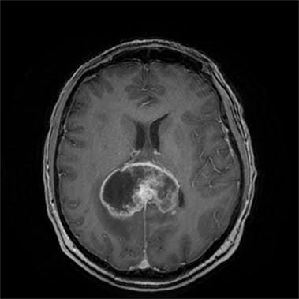

In [3]:
path = './data/testing/glioma_tumor'
name = 'image(32).jpg'

full_path = f'{path}/{name}'

# target sizes taken by tensorflow is -> 299x299, 224x224, 150x150

img = load_img(full_path, target_size=(299,299))
img

In [4]:
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input

In [5]:
train_gen = ImageDataGenerator(preprocessing_function= preprocess_input)

# batch size -> how many images at once
train_ds = train_gen.flow_from_directory('./data/training', target_size=(224,224), batch_size = 32)

Found 2870 images belonging to 4 classes.


In [6]:
train_ds.class_indices

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

In [7]:
# to check whats inside or how it generates, we use generator, which returns X(features/images) and y(labels)
X, y = next(train_ds)
X

array([[[[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  1.,   1.,   1.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
         [  1.,   1.,   1.],
         [  2.,   2.,   2.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  1.,   1.,   1.],
         [  2.,   2.,   2.],
         [  3.,   3.,   3.],
         ...,
         [  2.,   2.,   2.],
         [  2.,   2.,   2.],
         [  2.,   2.,   2.]],

        ...,

        [[  1.,   1.,   1.],
         [  1.,   1.,   1.],
         [  1.,   1.,   1.],
         ...,
         [  1.,   1.,   1.],
         [  1.,   1.,   1.],
         [  1.,   1.,   1.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  1.,   1.,   1.],
       

In [9]:
# it does one hot encoding
# this is also known as multiclass classification
y[:5]

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [10]:
test_ds = ImageDataGenerator(preprocessing_function= preprocess_input)
test_ds = test_ds.flow_from_directory('./data/testing', target_size=(224,224), batch_size = 32)

Found 394 images belonging to 4 classes.


In [11]:
base_model = EfficientNetB2(
        include_top=False,
        weights='imagenet',
        input_shape=(224, 224, 3)
    )

In [11]:
base_model.trainable = False
# this means that when we train our model, we do not want to change the Convolutional layers

In [12]:
inputs = keras.Input(shape=(224,224,3))

base = base_model(inputs, training=False)

pooling = keras.layers.GlobalAveragePooling2D()
vectors = pooling(base)

# 4 because we have 4 classes
outputs = keras.layers.Dense(4)(vectors)

model = keras.Model(inputs, outputs)

In [13]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate = learning_rate)

In [14]:
loss = keras.losses.CategoricalCrossentropy(from_logits=True)

In [15]:
model.compile(optimizer = optimizer, loss= loss, metrics=['accuracy', tf.keras.metrics.Recall(name='recall')])

In [44]:
'''
epoc -> how many times over we need to go over our dataset
'''
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 99s 988ms/step - accuracy: 0.7652 - loss: 0.5893 - recall: 0.9289 - val_accuracy: 0.6421 - val_loss: 1.2619 - val_recall: 0.8046
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 80s 891ms/step - accuracy: 0.8707 - loss: 0.3494 - recall: 0.9746 - val_accuracy: 0.6777 - val_loss: 1.2128 - val_recall: 0.8020
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 81s 906ms/step - accuracy: 0.8847 - loss: 0.2949 - recall: 0.9847 - val_accuracy: 0.6624 - val_loss: 1.2060 - val_recall: 0.8426
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 81s 899ms/step - accuracy: 0.8990 - loss: 0.2622 - recall: 0.9840 - val_accuracy: 0.6701 - val_loss: 1.2587 - val_recall: 0.8503
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 80s 887ms/step - accuracy: 0.9108 - loss: 0.2234 - recall: 0.9885 - val_accuracy: 0.7538 - val_loss: 1.0617 - val_recall: 0.8680
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 80s 893ms/step - accuracy: 0.9136 - loss: 0.2241 - recall: 0.9875 - val_accuracy: 0.7234 - val_loss: 1.3329 - val_recall: 0.850

In [16]:
# 1. Setup the Generator with Augmentations
# We use the specific 'preprocess_input' for EfficientNet to be safe
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Keeps data in 0-255 range as EfficientNet expects
    rotation_range=40,        # Rotate images to simulate different head positions
    width_shift_range=0.2,    # Shift image horizontally
    height_shift_range=0.2,   # Shift image vertically
    shear_range=0.2,          # Distort image angle
    zoom_range=0.2,           # Zoom in (simulate different scan proximities)
    vertical_flip=True,       # Flips upside down (Valid for Tumors, bad for Fashion)
    fill_mode='nearest',      # How to fill missing pixels after rotation
    validation_split=0.2      # Use 20% of data for validation
)

# 2. Setup the Path to your Dataset
DATA_DIR = 'data/training' 

# 3. Create the Train Generator
train_ds = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(224, 224),   # EfficientNetB0 standard size
    batch_size=32,
    class_mode='categorical', # Use 'categorical' for >2 classes, 'binary' for 2
    subset='training',        # This is the 80% split
    shuffle=True              # Always shuffle training data
)

# 4. Create the Validation Generator
# Note: We usually do NOT apply heavy augmentations to validation data, 
# but we must use the same split logic.
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

validation_ds = val_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',      # This is the 20% split
    shuffle=False             # No need to shuffle validation usually
)

Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.


In [17]:
def make_model(input_size=224, learning_rate=0.01, size_inner=100, droprate=0.2):
    base_model = EfficientNetB2(
        include_top=False,
        weights='imagenet',
        input_shape=(224, 224, 3)
    )
    base_model.trainable = False

    inputs = keras.Input(shape=(224,224,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    # 4 because we have 4 classes
    outputs = keras.layers.Dense(4)(drop)
    model = keras.Model(inputs, outputs)


    optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer = optimizer, loss= loss, metrics=['accuracy', tf.keras.metrics.Recall(name='recall')])

    return model
    

### testing with different parameters

In [54]:
%%time
# trying with different learning rates
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=validation_ds)
    scores[lr] = history.history
    print()
    print()

0.0001
Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.3274 - loss: 1.3802 - recall: 0.0000e+00 - val_accuracy: 0.2810 - val_loss: 1.3729 - val_recall: 0.0000e+00
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.4885 - loss: 1.3607 - recall: 0.0000e+00 - val_accuracy: 0.4241 - val_loss: 1.3578 - val_recall: 0.0000e+00
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.5525 - loss: 1.3434 - recall: 0.0000e+00 - val_accuracy: 0.4503 - val_loss: 1.3439 - val_recall: 0.0000e+00
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.5590 - loss: 1.3248 - recall: 0.0000e+00 - val_accuracy: 0.4799 - val_loss: 1.3272 - val_recall: 0.0000e+00
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.5568 - loss: 1.3006 - recall: 0.0000e+00 - val_accuracy: 0.5183 - val_loss: 1.3043 - val_recall: 0.0000e+00
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.5716 - loss: 1.2805 - recall: 0.0000e+00 - val_accuracy: 0.5358 - val

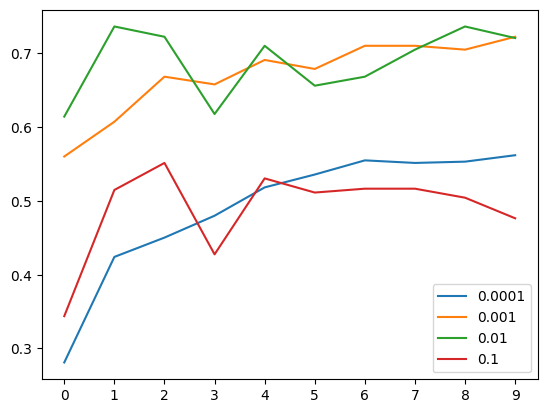

In [55]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=lr)
plt.xticks(np.arange(10))
plt.legend()

In [58]:
%%time

# lets take 0.01 - the best
# lets try with layers

scores = {}

for size in [10,100,1000]:
    print(size)
    model = make_model(size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=validation_ds)
    scores[size] = history.history
    print()
    print()

10
Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.5760 - loss: 1.0760 - recall: 0.2660 - val_accuracy: 0.5497 - val_loss: 1.0514 - val_recall: 0.3892
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.6639 - loss: 0.8333 - recall: 0.6165 - val_accuracy: 0.6283 - val_loss: 0.9531 - val_recall: 0.5829
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.6926 - loss: 0.7731 - recall: 0.6430 - val_accuracy: 0.6126 - val_loss: 0.8948 - val_recall: 0.6370
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.6913 - loss: 0.7573 - recall: 0.6513 - val_accuracy: 0.6736 - val_loss: 0.8692 - val_recall: 0.6510
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.6857 - loss: 0.7417 - recall: 0.6543 - val_accuracy: 0.6632 - val_loss: 0.8163 - val_recall: 0.6859
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7096 - loss: 0.7160 - recall: 0.7092 - val_accuracy: 0.6736 - val_loss: 0.8241 - val_recall: 0.6789
Epoch 7/10
72

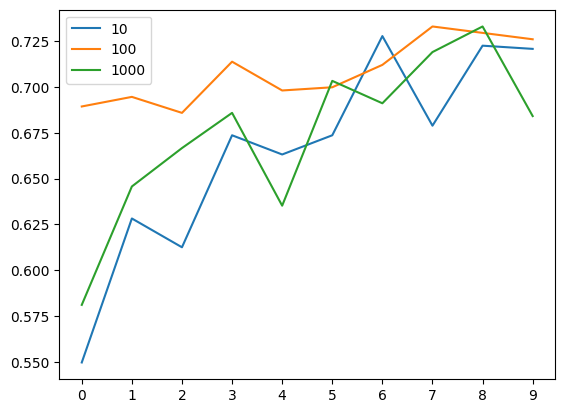

In [60]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=size)
plt.xticks(np.arange(10))
plt.legend()

In [62]:
%%time

# lets take lr 0.01, size 100 - the best
# lets try with droprate
scores = {}

for dr in [0.3,0.4,0.5,0.7]:
    print(dr)
    model = make_model(droprate=dr)
    history = model.fit(train_ds, epochs=10, validation_data=validation_ds)
    scores[dr] = history.history
    print()
    print()

0.3
Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.5529 - loss: 1.1329 - recall: 0.2860 - val_accuracy: 0.6911 - val_loss: 0.9802 - val_recall: 0.5323
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.6391 - loss: 0.8898 - recall: 0.5516 - val_accuracy: 0.7277 - val_loss: 0.8155 - val_recall: 0.7173
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.6443 - loss: 0.8489 - recall: 0.5712 - val_accuracy: 0.6353 - val_loss: 0.9167 - val_recall: 0.6318
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.6652 - loss: 0.7955 - recall: 0.5895 - val_accuracy: 0.6824 - val_loss: 0.8397 - val_recall: 0.6841
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.6495 - loss: 0.7950 - recall: 0.5990 - val_accuracy: 0.7400 - val_loss: 0.7463 - val_recall: 0.7609
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.6600 - loss: 0.8012 - recall: 0.6030 - val_accuracy: 0.6754 - val_loss: 0.8564 - val_recall: 0.6771
Epoch 7/10
7

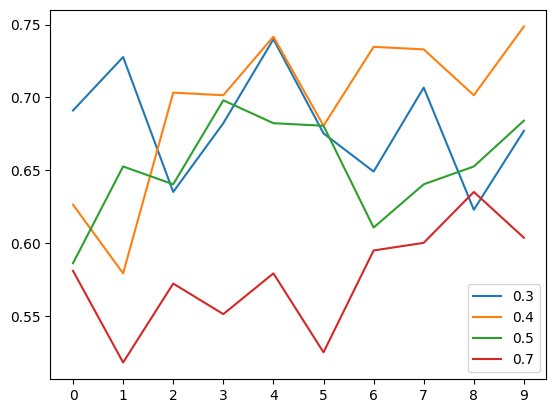

In [63]:
for dr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=dr)
plt.xticks(np.arange(10))
plt.legend()

In [64]:
# 0.2 is the best droprate

## now lets train the model with the best parameters

Now we first train using the trainable as false.

After that we unfreeze the top layers to train the CNN more accurately

In [18]:
model = make_model()

In [19]:
history_frozen = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.6761 - loss: 0.8668 - recall: 0.8298 - val_accuracy: 0.6789 - val_loss: 0.7636 - val_recall: 0.9005
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.7797 - loss: 0.5772 - recall: 0.9195 - val_accuracy: 0.6422 - val_loss: 0.9778 - val_recall: 0.8569
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.8050 - loss: 0.5002 - recall: 0.9360 - val_accuracy: 0.7487 - val_loss: 0.7722 - val_recall: 0.8621
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.8037 - loss: 0.5056 - recall: 0.9195 - val_accuracy: 0.7016 - val_loss: 0.7802 - val_recall: 0.9372
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.8093 - loss: 0.4574 - recall: 0.9512 - val_accuracy: 0.7435 - val_loss: 0.6652 - val_recall: 0.9337
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.8137 - loss: 0.4631 - recall: 0.9295 - val_accuracy: 0.6562 - val_loss: 0.8056 - val_recall: 0.9180
Epoch 7/10
72/72

In [20]:
def unfreeze_and_compile(model, learning_rate=1e-5):
    # 1e-5 -> 0.00001
    # Access the base model (EfficientNetB2)
    # (Index 0 is Input, Index 1 is EfficientNet)
    base_model = model.layers[1]

    # First, UNLOCK everything (Master Switch)
    base_model.trainable = True
    
    # Then, RE-LOCK the bottom layers (e.g., the first 90% of the model)
    # We slice [:-50], meaning "All layers EXCEPT the last 50"
    # Freezing the bottom layers keeps the basic shapes/edges stable
    # EfficientNetB2 has roughly 330+ layers. Let's unfreeze the last 50.
    for layer in base_model.layers[:-50]:
        layer.trainable = False

    # RE-COMPILE
    # Recompile for the trainable attribute changes to take effect.
    # Use a VERY LOW learning rate (1e-5) to avoid destroying what you just learned.
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy', tf.keras.metrics.Recall(name='recall')])
    
    return model

In [32]:
model = unfreeze_and_compile(model)

In [33]:
# Define the folder name
folder_name = 'efficentnetmodels'

# Create the folder if it doesn't exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Early Stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',       # Watch the Validation Loss
    patience=5,               # Wait 5 epochs before stopping
    restore_best_weights=True # CRITICAL: Go back to the best epoch, not the last one
)

checkpoint = keras.callbacks.ModelCheckpoint(
    os.path.join(folder_name, 'efficientnet_best_recall_{epoch:02d}_{val_recall:.3f}.keras'),
    save_best_only=True,
    monitor='val_recall', 
    mode='max'
)

In [34]:
%%time
# Train again (Fine-tuning)
# This will start from where the prev step left off
history_finetune = model.fit(
    train_ds, 
    epochs=50, # Add more epochs
    validation_data=validation_ds,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.8585 - loss: 0.3626 - recall: 0.9525 - val_accuracy: 0.7679 - val_loss: 0.6657 - val_recall: 0.8970
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.8751 - loss: 0.3292 - recall: 0.9586 - val_accuracy: 0.7714 - val_loss: 0.6358 - val_recall: 0.9092
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.8698 - loss: 0.3401 - recall: 0.9517 - val_accuracy: 0.7818 - val_loss: 0.6146 - val_recall: 0.9145
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.8677 - loss: 0.3362 - recall: 0.9621 - val_accuracy: 0.7714 - val_loss: 0.6187 - val_recall: 0.9145
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.8781 - loss: 0.3306 - recall: 0.9630 - val_accuracy: 0.7784 - val_loss: 0.6085 - val_recall: 0.9145
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.8637 - loss: 0.3494 - recall: 0.9599 - val_accuracy: 0.7888 - val_loss: 0.5924 - val_recall: 0.9197
Epoch 7/50

## trying with xception model

In [65]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input

In [66]:
# 1. Setup the Generator with Augmentations
# We use the specific 'preprocess_input' for EfficientNet to be safe
exception_train_datagen = ImageDataGenerator(
    preprocessing_function=xception_preprocess_input,  # Keeps data in 0-255 range as EfficientNet expects
    rotation_range=40,        # Rotate images to simulate different head positions
    width_shift_range=0.2,    # Shift image horizontally
    height_shift_range=0.2,   # Shift image vertically
    shear_range=0.2,          # Distort image angle
    zoom_range=0.2,           # Zoom in (simulate different scan proximities)
    horizontal_flip=True,     # Mirror image
    vertical_flip=True,       # Flips upside down (Valid for Tumors, bad for Fashion)
    fill_mode='nearest',      # How to fill missing pixels after rotation
    validation_split=0.2      # Use 20% of data for validation
)

# 2. Setup the Path to your Dataset
DATA_DIR = 'data/training' 

# 3. Create the Train Generator
exception_train_ds = exception_train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(224, 224),   # EfficientNetB0 standard size
    batch_size=32,
    class_mode='categorical', # Use 'categorical' for >2 classes, 'binary' for 2
    subset='training',        # This is the 80% split
    shuffle=True              # Always shuffle training data
)

# 4. Create the Validation Generator
# Note: We usually do NOT apply heavy augmentations to validation data, 
# but we must use the same split logic.
exception_val_datagen = ImageDataGenerator(
    preprocessing_function=xception_preprocess_input,
    validation_split=0.2
)

exception_validation_ds = exception_val_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',      # This is the 20% split
    shuffle=False             # No need to shuffle validation usually
)

Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.


In [67]:
# Define the folder name
folder_name = 'XceptionModels'

# Create the folder if it doesn't exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Early Stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',       # Watch the Validation Loss
    patience=5,               # Wait 5 epochs before stopping
    restore_best_weights=True # CRITICAL: Go back to the best epoch, not the last one
)

In [68]:
checkpoint_xception = keras.callbacks.ModelCheckpoint(
    os.path.join(folder_name, 'xception_best_recall_{epoch:02d}_{val_recall:.3f}.keras'),
    save_best_only=True,
    monitor='val_recall', 
    mode='max'
)

In [69]:
## lets try with Xception model
def make_model_xception(input_size=224, learning_rate=0.01, size_inner=100, droprate=0.2):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )
    base_model.trainable = False

    inputs = keras.Input(shape=(224,224,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    # 4 because we have 4 classes
    outputs = keras.layers.Dense(4)(drop)
    model = keras.Model(inputs, outputs)


    optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer = optimizer, loss= loss, metrics=['accuracy', tf.keras.metrics.Recall(name='recall')])

    return model
    

In [70]:
%%time

model_xception = make_model_xception(
    input_size=224,
    learning_rate=0.001,
    size_inner=100,
    droprate=0.2
)

history = model_xception.fit(exception_train_ds, epochs=50, validation_data=exception_validation_ds, callbacks=[early_stopping, checkpoint_xception])

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.6561 - loss: 0.8504 - recall: 0.8363 - val_accuracy: 0.7103 - val_loss: 0.7525 - val_recall: 0.8674
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.7610 - loss: 0.6274 - recall: 0.9012 - val_accuracy: 0.7086 - val_loss: 0.6941 - val_recall: 0.8726
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.7967 - loss: 0.5531 - recall: 0.9495 - val_accuracy: 0.7400 - val_loss: 0.6476 - val_recall: 0.9337
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.8115 - loss: 0.4984 - recall: 0.9491 - val_accuracy: 0.7277 - val_loss: 0.6676 - val_recall: 0.9023
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.8058 - loss: 0.4983 - recall: 0.9534 - val_accuracy: 0.7260 - val_loss: 0.7034 - val_recall: 0.9145
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.8193 - loss: 0.4693 - recall: 0.9761 - val_accuracy: 0.7504 - val_loss: 0.6373 - val_recall: 0.9616
Epoch 7/50

In [42]:
# lets move forward with efficientnet models. EfficientNet seems to be more accurate as well as the recall is better over the Xception model

## Loading the saved model

In [71]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.efficientnet import preprocess_input

In [77]:
saved_model = keras.models.load_model('efficentnetmodels/efficientnet_best_recall_34_0.951.keras')

In [78]:
test_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

test_ds = test_gen.flow_from_directory(
    './data/Testing',
    target_size=(224, 224),
    batch_size=32,
    shuffle=False
)

Found 394 images belonging to 4 classes.


In [79]:
saved_model.evaluate(test_ds)
# returns -> [loss, accuracy]

13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 728ms/step - accuracy: 0.7132 - loss: 1.1096 - recall: 0.8071


[1.1095556020736694, 0.7131979465484619, 0.807106614112854]

In [80]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

preds = saved_model.predict(test_ds)
y_pred = np.argmax(preds, axis=1)
y_true = test_ds.classes

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=test_ds.class_indices.keys()))


13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step
[[ 29  56  12   3]
 [  5 107   3   0]
 [  1   4 100   0]
 [  5  12  12  45]]
                  precision    recall  f1-score   support

    glioma_tumor       0.72      0.29      0.41       100
meningioma_tumor       0.60      0.93      0.73       115
        no_tumor       0.79      0.95      0.86       105
 pituitary_tumor       0.94      0.61      0.74        74

        accuracy                           0.71       394
       macro avg       0.76      0.70      0.69       394
    weighted avg       0.74      0.71      0.69       394



In [81]:
classes = [
    'glioma_tumor',
    'meningioma_tumor',
    'no_tumor',
    'pituitary_tumor'
]


def predict(path):
    img = load_img(path, target_size = (224,224))

    x = np.array(img)
    X = np.array([x]) 
    
    X = preprocess_input(X)

    pred = model.predict(X)

    pred_list = dict(zip(classes,pred[0]))

    arr = np.array(list(pred_list.items()))
    arr[:,1] = arr[:,1].astype(float)
    sorted_arr = arr[arr[:,1].astype(float).argsort()[::-1]]
    
    return sorted_arr


In [83]:
path = "D:\Rohan\Machine Learning and AI\ML Zoomcamp\Course code\machine-learning-zoomcamp\Capstone_project\data\Testing\meningioma_tumor\image(15).jpg"
predict(path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([['meningioma_tumor', '4.343569'],
       ['glioma_tumor', '0.010792263'],
       ['no_tumor', '-0.97965634'],
       ['pituitary_tumor', '-2.8189816']], dtype='<U32')

# lets improve the model

So far we know that 
- the dataset is quite small if we look at, and accordindly the accuracy of the model is ~71% (which is not bad)
- lets try to increase the performance of the model and see if with existing data can we increase the accuracy and recall

In [2]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import load_img

import numpy as np
import os

from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input

import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [8]:
path = './data/testing/glioma_tumor'
name = 'image(32).jpg'

full_path = f'{path}/{name}'

# target sizes taken by tensorflow is -> 299x299, 224x224, 150x150

# img = load_img(full_path, target_size=(299,299))
# img

In [19]:
train_gen = ImageDataGenerator(preprocessing_function= preprocess_input)

# batch size -> how many images at once
train_ds = train_gen.flow_from_directory('./data/training', target_size=(224,224), batch_size = 32)

Found 2870 images belonging to 4 classes.


In [23]:
test_gen = ImageDataGenerator(preprocessing_function= preprocess_input)
test_ds = test_gen.flow_from_directory('./data/testing', target_size=(224,224), batch_size = 32)

Found 394 images belonging to 4 classes.


In [24]:
# lets check if we have class imbalance
counts = np.bincount(train_ds.classes)
print(dict(zip(train_ds.class_indices.keys(), counts)))

counts = np.bincount(test_ds.classes)
print(dict(zip(train_ds.class_indices.keys(), counts)))

{'glioma_tumor': 826, 'meningioma_tumor': 822, 'no_tumor': 395, 'pituitary_tumor': 827}
{'glioma_tumor': 100, 'meningioma_tumor': 115, 'no_tumor': 105, 'pituitary_tumor': 74}


In [12]:
# now since our dataset is small, so even few images are wrongly predicted it will give us 1% drop is accuracy.
# the above result indicates theres no class imbalance. just 'no_tumor' is half of others. 
'''
our assumtions
70–80% → baseline

85% → strong

90%+ → rare without more data or multimodal input
'''

'\nour assumtions\n70–80% → baseline\n\n85% → strong\n\n90%+ → rare without more data or multimodal input\n'

In [25]:
# lets load our saved model, to check the 
from tensorflow.keras.models import load_model
saved_model = keras.models.load_model('efficentnetmodels/efficientnet_best_recall_34_0.951.keras')

In [26]:
results = saved_model.evaluate(test_ds)

13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 802ms/step - accuracy: 0.7132 - loss: 1.1096 - recall: 0.8071


In [27]:
results

[1.109555721282959, 0.7131979465484619, 0.807106614112854]

In [28]:
test_ds.reset()

y_pred_probs = saved_model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_ds.classes


13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step


In [29]:
from sklearn.metrics import classification_report

print(classification_report(
    y_true,
    y_pred,
    target_names=test_ds.class_indices.keys(),
    digits=4
))

                  precision    recall  f1-score   support

    glioma_tumor     0.2500    0.1000    0.1429       100
meningioma_tumor     0.3296    0.5130    0.4014       115
        no_tumor     0.2913    0.3524    0.3190       105
 pituitary_tumor     0.1667    0.1081    0.1311        74

        accuracy                         0.2893       394
       macro avg     0.2594    0.2684    0.2486       394
    weighted avg     0.2686    0.2893    0.2630       394



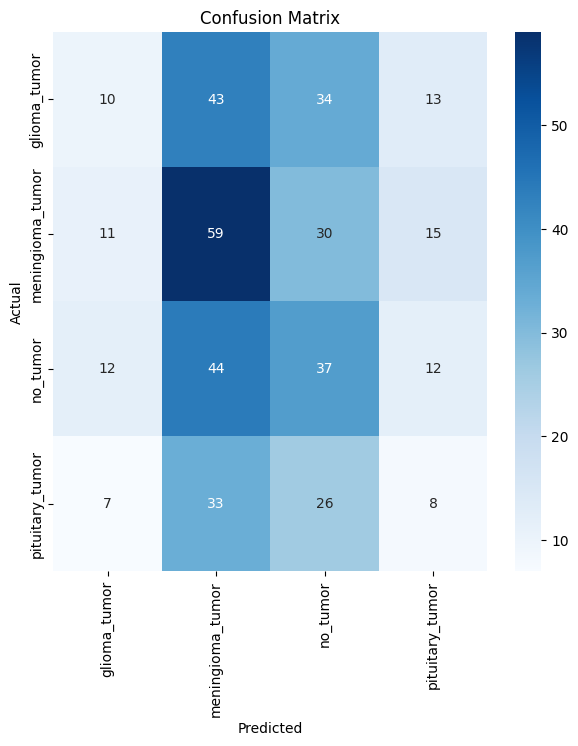

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(7,7))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=test_ds.class_indices.keys(),
    yticklabels=test_ds.class_indices.keys()
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


### key takeways

- Misleading Training Metrics
Although Keras reported ~71% accuracy and ~80% recall, these were micro-averaged metrics and did not reflect per-class tumor performance in a 4-class problem. Proper evaluation using classification_report revealed the true accuracy was ~29%.

- Severe Class Confusion & Mode Collapse
The confusion matrix showed the model was over-predicting certain classes (especially meningioma and no_tumor), while failing to correctly identify glioma and pituitary tumors (≈10% recall each). This indicates mode collapse rather than meaningful tumor discrimination.

- Unfreezing Too Many Layers with Limited Data
Unfreezing the last 50 layers of EfficientNetB2 with only ~2.8k training images likely caused feature drift and overfitting, degrading the pretrained representations instead of refining them.

- Over-Aggressive / Medically Invalid Augmentation
Augmentations such as large rotations, shear, and vertical flips distorted subtle tumor morphology, making different tumor types appear visually similar and increasing inter-class confusion.

- Lack of Class-Aware Optimization
Even though class imbalance was mild, the absence of class weighting or focal loss allowed the model to focus on “easier” classes, worsening recall for clinically important tumor types.

- Key Lesson
The model failure was systematic, not random. The issue lies in training strategy and evaluation, not in model choice. A controlled retraining pipeline (proper freezing, safe augmentation, class weighting, and correct metrics) is required.

In [31]:
# now lets tune the model, with changes
base_model = EfficientNetB2(
        include_top=False,
        weights='imagenet',
        input_shape=(260, 260, 3)
    )

In [32]:
base_model.trainable = False

In [48]:
train_datagen = ImageDataGenerator(
    preprocessing_function= preprocess_input,
    rotation_range=10,          # mild head tilt
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
    horizontal_flip=True,       # safe for brain MRI
    validation_split=0.2
)
train_ds = train_datagen.flow_from_directory(
    './data/training',
    target_size=(260,260),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

val_ds = val_datagen.flow_from_directory(
    './data/training',
    target_size=(260, 260),
    batch_size=32,
    class_mode='categorical',
    subset='validation',      # This is the 20% split
    shuffle=False             # No need to shuffle validation usually
)



Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.


In [49]:
test_gen = ImageDataGenerator(preprocessing_function= preprocess_input)
test_ds = test_gen.flow_from_directory('./data/testing', target_size=(260,260), batch_size = 32)

Found 394 images belonging to 4 classes.


In [50]:
inputs = keras.Input(shape=(260,260,3))

base = base_model(inputs, training=False)

pooling = keras.layers.GlobalAveragePooling2D()
vectors = pooling(base)
x = tf.keras.layers.BatchNormalization()(vectors)

# 4 because we have 4 classes
outputs = keras.layers.Dense(256, activation='relu')(x)
dropout = tf.keras.layers.Dropout(0.5)(outputs)
outputs = tf.keras.layers.Dense(4, activation='softmax')(dropout)
model = keras.Model(inputs, outputs)

In [51]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_ds.classes),
    y=train_ds.classes
)

class_weights = dict(enumerate(class_weights))


In [52]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)


In [53]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=3,
    min_lr=1e-6,
    verbose=1
)


In [54]:
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [81]:
# Define the folder name
folder_name = 'new_efficentnetmodels'

# Create the folder if it doesn't exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Early Stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',       # Watch the Validation Loss
    patience=5,               # Wait 5 epochs before stopping
    restore_best_weights=True # CRITICAL: Go back to the best epoch, not the last one
)

checkpoint = keras.callbacks.ModelCheckpoint(
    os.path.join(folder_name, 'efficientnet_best_recall_{epoch:02d}_{val_loss:.3f}.keras'),
    save_best_only=True,
    monitor='val_loss',
    verbose=1
)

In [58]:
%%time

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    class_weight=class_weights,
    callbacks=[lr_scheduler, checkpoint]
)


Epoch 1/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6739 - loss: 0.8595
Epoch 1: val_loss improved from None to 0.83029, saving model to new_efficentnetmodels\efficientnet_best_recall_01_0.830.keras
72/72 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.6852 - loss: 0.7869 - val_accuracy: 0.6963 - val_loss: 0.8303 - learning_rate: 1.0000e-04
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7285 - loss: 0.6895
Epoch 2: val_loss improved from 0.83029 to 0.71970, saving model to new_efficentnetmodels\efficientnet_best_recall_02_0.720.keras
72/72 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.7458 - loss: 0.6354 - val_accuracy: 0.7243 - val_loss: 0.7197 - learning_rate: 1.0000e-04
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7812 - loss: 0.5706
Epoch 3: val_loss improved from 0.71970 to 0.66379, saving model to new_efficentnetmodels\efficientnet_best_recall_03_0.664.keras
72/72 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.7815 - loss: 0.5428 - 

In [59]:
# lets test on the test dataset
saved_model = keras.models.load_model('new_efficentnetmodels/efficientnet_best_recall_10_0.537.keras')

In [60]:
saved_model.evaluate(test_ds)

13/13 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7107 - loss: 1.1131


[1.1131274700164795, 0.710659921169281]

In [61]:
test_ds.reset()

y_pred_probs = saved_model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_ds.classes


13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step


In [62]:
print(classification_report(
    y_true,
    y_pred,
    target_names=test_ds.class_indices.keys(),
    digits=4
))

                  precision    recall  f1-score   support

    glioma_tumor     0.2083    0.0500    0.0806       100
meningioma_tumor     0.3248    0.4435    0.3750       115
        no_tumor     0.2534    0.3524    0.2948       105
 pituitary_tumor     0.1791    0.1622    0.1702        74

        accuracy                         0.2665       394
       macro avg     0.2414    0.2520    0.2302       394
    weighted avg     0.2489    0.2665    0.2405       394



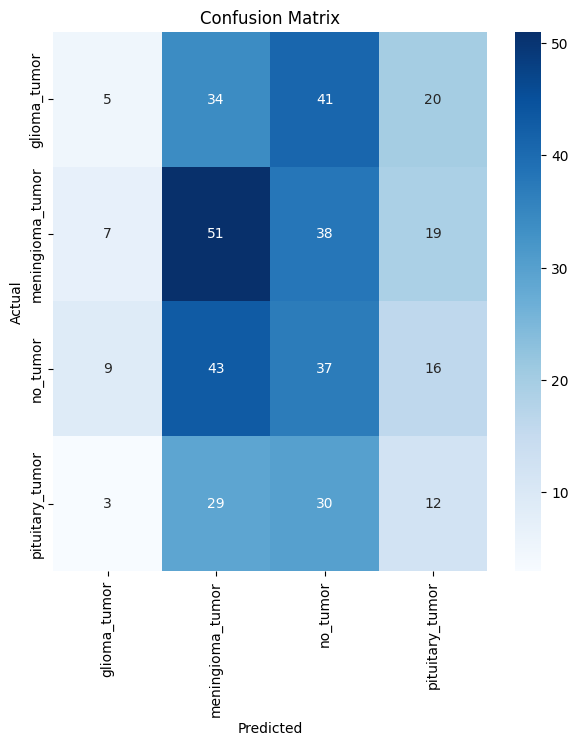

In [63]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(7,7))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=test_ds.class_indices.keys(),
    yticklabels=test_ds.class_indices.keys()
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [64]:
# the results are somewhat same as prevs model
# lets try to unfreeze the layers now, max 15 layers

In [74]:
# now lets fine tune the best model further
model = tf.keras.models.load_model(
    "new_efficentnetmodels/efficientnet_best_recall_10_0.537.keras"
)

In [75]:
base_model = model.layers[1]  # usually EfficientNet is layer 1
base_model.name

'efficientnetb2'

In [76]:

base_model.trainable = True

for layer in base_model.layers[:-15]:
    layer.trainable = False


In [77]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)


In [78]:
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [82]:
# Define the folder name
folder_name = 'new_efficentnetmodels'

# Create the folder if it doesn't exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Early Stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',       # Watch the Validation Loss
    patience=5,               # Wait 5 epochs before stopping
    restore_best_weights=True # CRITICAL: Go back to the best epoch, not the last one
)

checkpoint = keras.callbacks.ModelCheckpoint(
    os.path.join(folder_name, '1_efficientnet_best_recall_{epoch:02d}_{val_loss:.3f}.keras'),
    save_best_only=True,
    monitor='val_loss',
    verbose=1
)

In [83]:
%%time

history_ft = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    class_weight=class_weights,
    callbacks=[lr_scheduler, checkpoint]
)


Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8320 - loss: 0.4266
Epoch 1: val_loss improved from None to 0.56144, saving model to new_efficentnetmodels\1_efficientnet_best_recall_01_0.561.keras
72/72 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.8224 - loss: 0.4385 - val_accuracy: 0.7853 - val_loss: 0.5614 - learning_rate: 1.0000e-05
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8401 - loss: 0.4037
Epoch 2: val_loss did not improve from 0.56144
72/72 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.8450 - loss: 0.3855 - val_accuracy: 0.7888 - val_loss: 0.5615 - learning_rate: 1.0000e-05
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8606 - loss: 0.3671
Epoch 3: ReduceLROnPlateau reducing learning rate to 2.9999999242136253e-06.

Epoch 3: val_loss improved from 0.56144 to 0.55588, saving model to new_efficentnetmodels\1_efficientnet_best_recall_03_0.556.keras
72/72 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.8594 - loss: 0.3640 - v

In [85]:
def test_model(path):
    saved_model = keras.models.load_model(path)
    results = saved_model.evaluate(test_ds)

    print(results)

    test_ds.reset()

    y_pred_probs = saved_model.predict(test_ds)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = test_ds.classes

    print(classification_report(
        y_true,
        y_pred,
        target_names=test_ds.class_indices.keys(),
        digits=4
    ))

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(7,7))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=test_ds.class_indices.keys(),
        yticklabels=test_ds.class_indices.keys()
    )
    
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7030 - loss: 1.1500
[1.1499793529510498, 0.703045666217804]
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step
                  precision    recall  f1-score   support

    glioma_tumor     0.2414    0.0700    0.1085       100
meningioma_tumor     0.2715    0.3565    0.3083       115
        no_tumor     0.2282    0.3238    0.2677       105
 pituitary_tumor     0.2308    0.2027    0.2158        74

        accuracy                         0.2462       394
       macro avg     0.2430    0.2383    0.2251       394
    weighted avg     0.2447    0.2462    0.2294       394



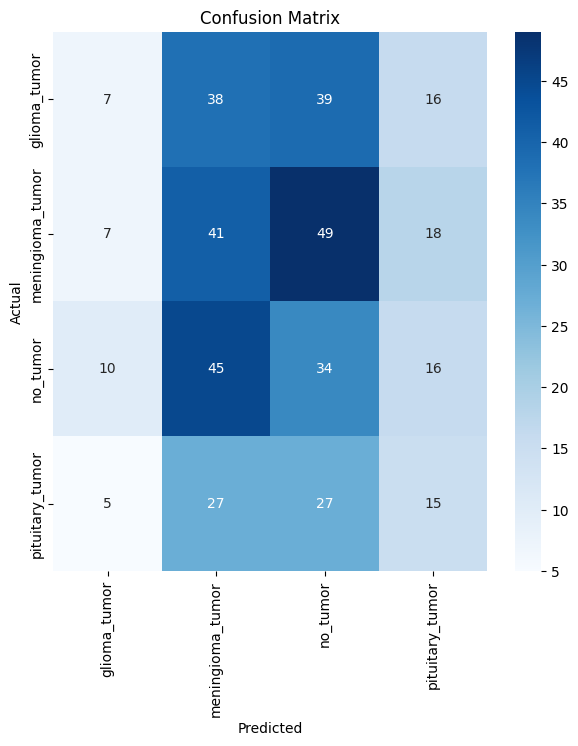

In [86]:
test_model('new_efficentnetmodels/1_efficientnet_best_recall_03_0.556.keras')

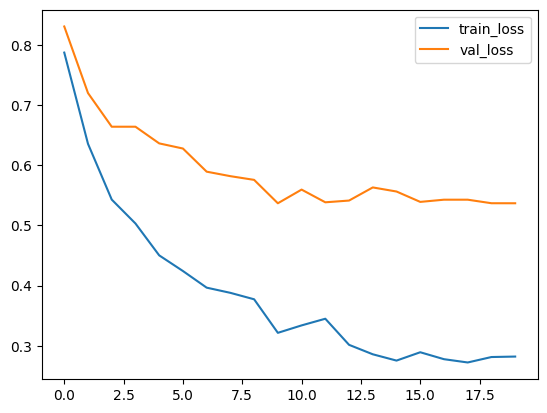

In [87]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(); plt.show()


In [93]:
base_model = model.get_layer("efficientnetb2")


In [94]:
for layer in base_model.layers[-30:]:
    print(layer.name)


block7a_expand_bn
block7a_expand_activation
block7a_dwconv
block7a_bn
block7a_activation
block7a_se_squeeze
block7a_se_reshape
block7a_se_reduce
block7a_se_expand
block7a_se_excite
block7a_project_conv
block7a_project_bn
block7b_expand_conv
block7b_expand_bn
block7b_expand_activation
block7b_dwconv
block7b_bn
block7b_activation
block7b_se_squeeze
block7b_se_reshape
block7b_se_reduce
block7b_se_expand
block7b_se_excite
block7b_project_conv
block7b_project_bn
block7b_drop
block7b_add
top_conv
top_bn
top_activation


In [118]:
# since we have hit limitations. lets move to final conclusion

In [122]:
# Save the most confident wrong predictions. below we can see the wrong images in analysis folder.

In [120]:
import shutil

y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_ds.classes

confidences = np.max(y_pred_probs, axis=1)
wrong_idx = np.where(y_true != y_pred)[0]

top_wrong = wrong_idx[np.argsort(confidences[wrong_idx])[-8:]]

os.makedirs("analysis/top_confident_errors", exist_ok=True)

for i in top_wrong:
    shutil.copy(
        test_ds.filepaths[i],
        f"analysis/top_confident_errors/{i}_true{y_true[i]}_pred{y_pred[i]}.png"
    )


13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step


# Quantize to INT8 (TensorFlow Lite)

> Original model size: 47.48 MB

> Quantized model size: 8.50 MB


In [123]:
best_model = keras.models.load_model('new_efficentnetmodels/1_efficientnet_best_recall_03_0.556.keras')

In [124]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(best_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

with open("brain_tumor_classifier_int8.tflite", "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\Rohan\AppData\Local\Temp\tmpbjxsgq48\assets


INFO:tensorflow:Assets written to: C:\Users\Rohan\AppData\Local\Temp\tmpbjxsgq48\assets


Saved artifact at 'C:\Users\Rohan\AppData\Local\Temp\tmpbjxsgq48'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 260, 260, 3), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  3083475044112: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  3083475042768: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  3083492574224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3083492574608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3083492573264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3083492575760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3083492576336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3083492575184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3083492574032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3083492576144: TensorSpec(shape=(), dtype=tf.resource,

In [125]:
import os

original_size = os.path.getsize("new_efficentnetmodels/1_efficientnet_best_recall_03_0.556.keras") / (1024 * 1024)
quantized_size = os.path.getsize("brain_tumor_classifier_int8.tflite") / (1024 * 1024)

print(f"Original model size: {original_size:.2f} MB")
print(f"Quantized model size: {quantized_size:.2f} MB")


Original model size: 47.48 MB
Quantized model size: 8.50 MB


In [128]:
#loading the quantized model


interpreter = tf.lite.Interpreter(
    model_path="brain_tumor_classifier_int8.tflite"
)
interpreter.allocate_tensors()


C:\Users\Rohan\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [129]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input details:", input_details)
print("Output details:", output_details)


Input details: [{'name': 'serving_default_input_layer_3:0', 'index': 0, 'shape': array([  1, 260, 260,   3]), 'shape_signature': array([ -1, 260, 260,   3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details: [{'name': 'StatefulPartitionedCall_1:0', 'index': 689, 'shape': array([1, 4]), 'shape_signature': array([-1,  4]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [130]:
img_path = "./data/Testing/no_tumor/image(4).jpg"

In [131]:

# lets test

img = tf.keras.preprocessing.image.load_img(
    img_path,
    target_size=(260,260)
)
img = tf.keras.preprocessing.image.img_to_array(img)
img = preprocess_input(img)
img = img[np.newaxis, ...].astype("float32")


In [132]:
interpreter.set_tensor(
    input_details[0]['index'],
    img
)


In [133]:
interpreter.invoke()


In [136]:
classes = [
    'glioma_tumor',
    'meningioma_tumor',
    'no_tumor',
    'pituitary_tumor'
]

output = interpreter.get_tensor(output_details[0]['index'])

print(dict(zip(classes, output[0])))

{'glioma_tumor': 0.00025264898, 'meningioma_tumor': 0.0024288327, 'no_tumor': 0.99671316, 'pituitary_tumor': 0.0006054495}


In [139]:
pred_class = output.argmax(axis=1)[0]
confidence = output.max()

print("Predicted class:", pred_class)
print("Predicted label", classes[pred_class])
print("Confidence:", confidence)


Predicted class: 2
Predicted label no_tumor
Confidence: 0.99671316


# - Limitations:
The model was trained on a relatively small dataset with limited samples per tumor type, which constrained its ability to distinguish between visually similar tumors such as glioma and meningioma. The approach performs whole-image classification without explicit tumor localization, which likely reduces sensitivity for small or diffuse tumors.

# - Future Work:
Future improvements include incorporating tumor localization or segmentation, using patch-based classification, increasing dataset size, and integrating multimodal clinical data. Explainability methods such as Grad-CAM could also be added once model performance stabilizes.